In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
#import statsmodels.formula.api as smf
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from functools import reduce
import numpy as np
#import ee
#import geemap
import geopandas as gpd
import rioxarray as rxr
import rasterstats as rs
from rasterio.plot import show
import rasterio
import cartopy.crs as ccrs
import gdal
import statsmodels.formula.api as smf
import math

%matplotlib inline
plt.rcParams["font.family"] = "Arial"

In [28]:
ndvi_irri = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ndvi_irrigated.csv')[['ADM3_EN','yr1','yr5']]
ndvi_rf =pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ndvi_rainfed.csv')[['ADM3_EN','yr1','yr5']]
ndvi_all = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ndvi_all.csv')[['ADM3_EN','yr1','yr5']]


# 5 YEAR INCREMENTS
## Irrigated Rice


In [30]:
startYear = 2013
#startYear = 2017

endYear = 2017
actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'irri')].reset_index(drop=True)
actualFixed = actual.rename(columns={'muni':'ADM3_EN','year':'Date'}).drop(columns=['ecosystem'])
actualFixed= actualFixed[(actualFixed.Date <= endYear) & (actualFixed.Date >= startYear)].groupby(['ADM3_EN','param']).mean().reset_index(drop=False)

merged = pd.merge(actualFixed, ndvi_irri, left_on='ADM3_EN', right_on='ADM3_EN')


df = merged.rename(columns={'value':'actualYield'})
df = pd.DataFrame(df)

formula = 'actualYield ~ yr5'
results = smf.ols(formula = formula, 
                 missing='drop',
                 data=df).fit()
print(results.summary())
#print(pd.DataFrame(results.params).round(decimals=4).transpose())

                            OLS Regression Results                            
Dep. Variable:            actualYield   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     5.818
Date:                Sat, 12 Mar 2022   Prob (F-statistic):             0.0282
Time:                        17:29:21   Log-Likelihood:                -1.4062
No. Observations:                  18   AIC:                             6.812
Df Residuals:                      16   BIC:                             8.593
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5809      2.060     -0.282      0.7

/Users/delatorredm/miniconda3/envs/ee/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Rain-fed rice

In [31]:
startYear = 2013
#startYear = 2017

endYear = 2017
actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'rf')].reset_index(drop=True)
actualFixed = actual.rename(columns={'muni':'ADM3_EN','year':'Date'}).drop(columns=['ecosystem'])
actualFixed= actualFixed[(actualFixed.Date <= endYear) & (actualFixed.Date >= startYear)].groupby(['ADM3_EN','param']).mean().reset_index(drop=False)

merged = pd.merge(actualFixed, ndvi_rf, left_on='ADM3_EN', right_on='ADM3_EN')


df = merged.rename(columns={'value':'actualYield'})
df = pd.DataFrame(df)

formula = 'actualYield ~ yr5'
results = smf.ols(formula = formula, 
                 missing='drop',
                 data=df).fit()
print(results.summary())
#print(pd.DataFrame(results.params).round(decimals=4).transpose())

                            OLS Regression Results                            
Dep. Variable:            actualYield   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     3.555
Date:                Sat, 12 Mar 2022   Prob (F-statistic):             0.0667
Time:                        17:30:04   Log-Likelihood:                -14.459
No. Observations:                  42   AIC:                             32.92
Df Residuals:                      40   BIC:                             36.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6678      1.478      0.452      0.6

## ALL RICE

In [13]:
points = '/Users/delatorredm/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Ch4_Climate_Impacts/geospatial_layers/out5yr/intersect_DS_5yr.shp'
#points = '/Users/delatorredm/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Ch4_Climate_Impacts/geospatial_layers/out2017/intersect_DS_2017.shp'

points = gpd.read_file(points)

startYear = 2013
endYear = 2017
actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')

irrlist = [
'Anilao',
'Banate',
'Barotac Nuevo',
'Barotac Viejo',
'Dingle',
'Dumangas',
'Iloilo City',
'Janiuay',
'Leganes',
'Mina',
'New Lucena',
'Oton',
'Pavia',
'Pototan',
'San Miguel',
'Santa Barbara',
'Tigbauan',
'Zarraga',
]

list1 = actual[(actual.param == 'yield') & (actual.ecosystem == 'rf')].reset_index(drop=True)
list1 = list1.loc[~list1['muni'].isin(irrlist)]

list2 = actual[(actual.param == 'yield') & (actual.ecosystem == 'all')].reset_index(drop=True)
list2 = list2.loc[list2['muni'].isin(irrlist)]
actual = pd.concat([list1, list2])

actualFixed = actual.rename(columns={'muni':'ADM3_EN','year':'Date'}).drop(columns=['ecosystem']).reset_index(drop=True)
actualFixed= actualFixed[(actualFixed.Date <= endYear) & (actualFixed.Date >= startYear)].groupby(['ADM3_EN','param']).mean().reset_index(drop=False)
actualFixed

points2 = points.groupby(['ADM3_EN']).mean().reset_index(drop=False)

merged = pd.merge(actualFixed, points2, left_on='ADM3_EN', right_on='ADM3_EN')
df = merged.rename(columns={'value':'actualYield','ch3_slope':'slope','ch3_elevat':'elevation'})
df = pd.DataFrame(df)


#formula = 'actualYield ~ ndvi + LST_Night_1km + pcp + et + pet + slope + elevation'
formula = 'actualYield ~ ndvi'
results = smf.ols(formula = formula, 
                 missing='drop',
                 data=df).fit()
print(results.summary())
print(pd.DataFrame(results.params).round(decimals=4).transpose())



                            OLS Regression Results                            
Dep. Variable:            actualYield   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5866
Date:                Sat, 12 Mar 2022   Prob (F-statistic):              0.448
Time:                        17:19:24   Log-Likelihood:                -32.264
No. Observations:                  44   AIC:                             68.53
Df Residuals:                      42   BIC:                             72.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7392      2.466      0.705      0.4

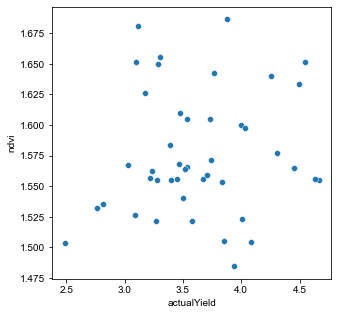

In [16]:
fig, ax = plt.subplots(figsize=(5,5))
fig = sns.scatterplot(x="actualYield", y="ndvi", data=df)